In [1]:
import librosa
import glob
import json
import os
from tqdm import tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
dirs = [ f.name for f in os.scandir('.') if f.is_dir() and 'english' in f.name ]
if '.ipynb_checkpoints' in dirs: dirs.remove('.ipynb_checkpoints')
print(dirs)

['tamil_male_english', 'gujarati_female_english', 'kannada_male_english', 'malayalam_male_english', 'hindi_male_english', 'manipuri_female_english', 'assamese_female_english', 'rajasthani_male_english']


In [3]:
import pickle 
import numpy as np

def load_features(file_dir):
    features = []
    with open(file_dir.replace('.json', '_39.file'), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    features = np.concatenate(features, axis=0)
    return features
base_dir = './'

ground_list, ground_list_Y, ground_features = [], [], []
for i, _dir in enumerate(dirs):
    selection_file_path = base_dir + _dir + '/manifests/selection.json'
    selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
    selection_file_list = selection_file_list
    ground_list.extend(selection_file_list)
    ground_features.append(load_features(selection_file_path))
    print(_dir+" has "+str(len(selection_file_list))+" samples.")
    ground_list_Y.extend([i]*len(selection_file_list))
    
ground_features = np.concatenate(ground_features, axis=0)
ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
print(len(ground_list), ground_features.shape, ground_features_Y.shape)

tamil_male_english has 5183 samples.
gujarati_female_english has 3169 samples.
kannada_male_english has 3244 samples.
malayalam_male_english has 3491 samples.
hindi_male_english has 3492 samples.
manipuri_female_english has 6925 samples.
assamese_female_english has 5765 samples.
rajasthani_male_english has 3267 samples.
34536 (34536, 39) (34536, 1)


In [4]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def _color_map(dirs):
#     color = ["midnightblue", "royalblue", "indigo", "darkgreen", 'lime', "green", 'pink', 'fuchsia', 'red', '#D3D3D3', 
#              'yellow', 'black']
    color = ["midnightblue", "darkgreen", 'lime', 'pink', 'red', 'lime', 'yellow', 'purple']
    color_map = {}
    for _dir, color in zip(dirs, color):
        color_map[_dir] = color
    return color_map

In [16]:
X, y = ground_features, ground_features_Y

print(X.shape, y.shape)
print('\n\n')
feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y

# label_map = dict(enumerate([x[:-8].split('_')[0]+'['+x[:-8].split('_')[1][0].upper()+']' for x in dirs]))
label_map = dict(enumerate([x[0].upper()+x[1]+', '+x[:-8].split('_')[1][0].upper() for x in dirs]))
df['label'] = df['y'].apply(lambda i: label_map[i])

(34536, 39) (34536, 1)





In [6]:
print(dirs)

['tamil_male_english', 'gujarati_female_english', 'kannada_male_english', 'malayalam_male_english', 'hindi_male_english', 'manipuri_female_english', 'assamese_female_english', 'rajasthani_male_english']


In [17]:
perp=40
iters=1000
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
tsne_results = tsne.fit_transform(df[feat_cols].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34536 samples in 0.002s...
[t-SNE] Computed neighbors for 34536 samples in 27.719s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34536
[t-SNE] Computed conditional probabilities for sample 2000 / 34536
[t-SNE] Computed conditional probabilities for sample 3000 / 34536
[t-SNE] Computed conditional probabilities for sample 4000 / 34536
[t-SNE] Computed conditional probabilities for sample 5000 / 34536
[t-SNE] Computed conditional probabilities for sample 6000 / 34536
[t-SNE] Computed conditional probabilities for sample 7000 / 34536
[t-SNE] Computed conditional probabilities for sample 8000 / 34536
[t-SNE] Computed conditional probabilities for sample 9000 / 34536
[t-SNE] Computed conditional probabilities for sample 10000 / 34536
[t-SNE] Computed conditional probabilities for sample 11000 / 34536
[t-SNE] Computed conditional probabilities for sample 12000 / 34536
[t-SNE] Computed conditional probabilities for s

In [18]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
# df.to_pickle('t-sne-1000.pkl')

In [13]:
# mpl.use('pgf')
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

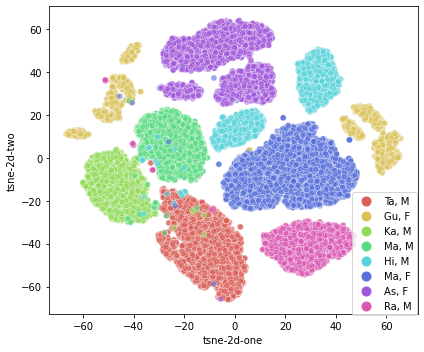

In [19]:
%matplotlib inline

fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
# _ax.title.set_text('8 accents (1 speaker each) ground set: perplexity {}, iters {}'.format(perp, iters))
palette = np.array(sns.color_palette("bright", 8))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
#     palette=_color_map(dirs),
#     palette="deep",
    data=df,
    legend="full",
#     markers= [0.5]*y.shape[0],
#     legend=False,
    alpha=0.6,
    ax = _ax
)
# g.legend(
#          loc='upper right', 
# #          loc=1,
#          bbox_to_anchor=(1.013, 1.017), 
# #          prop={'size':10}, markerscale=2,
# #          labels=[x[0].upper()+x[1] for x in dirs]
# )
# fig.tight_layout()
# fig.savefig('IndicTTS_t-SNE.svg') # , bbox_inches='tight', pad_inches=0
# plt.savefig('IndicTTS_t-SNE.pgf', bbox_inches='tight', format='pgf', dpi=1200)
# plt.show()
# plt.close()


g.legend(
         loc='lower right',
         bbox_to_anchor=(1.013, -0.02), 
         prop={'size':10}, markerscale=1.5,
#          labels=[x[0].upper()+x[1] for x in dirs]
)
fig.tight_layout()
# fig.savefig('IndicTTS_t-SNE.svg') # , bbox_inches='tight', pad_inches=0
# plt.savefig('IndicTTS_t-SNE-1000.pgf', bbox_inches='tight', format='pgf', dpi=300)
plt.savefig('IndicTTS_t-SNE.pdf', bbox_inches='tight', format='pdf', dpi=300)
plt.show()

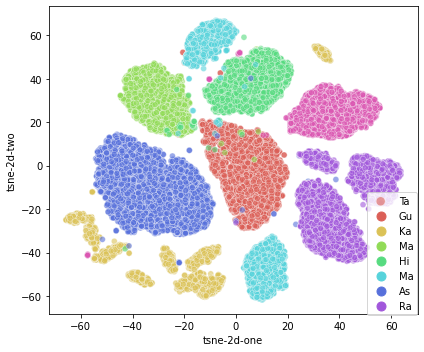

In [10]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
dirs=['tamil_male_english','gujarati_female_english', 'kannada_male_english', 'malayalam_male_english', 
      'hindi_male_english', 'manipuri_female_english', 'assamese_female_english', 'rajasthani_male_english']
# palette = np.array(sns.color_palette("bright", 8))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
    data=df,
    legend="full",
    alpha=0.6,
    ax = _ax
)
g.legend(
         loc='lower right',
         bbox_to_anchor=(1.013, -0.02), 
         prop={'size':10}, markerscale=1.5,
         labels=[x[0].upper()+x[1] for x in dirs]
)
fig.tight_layout()
# fig.savefig('IndicTTS_t-SNE.svg') # , bbox_inches='tight', pad_inches=0
# plt.savefig('IndicTTS_t-SNE-1000.pgf', bbox_inches='tight', format='pgf', dpi=300)
plt.savefig('IndicTTS_t-SNE.pdf', bbox_inches='tight', format='pdf', dpi=300)
plt.show()

In [9]:
perp=40
iters=1000
tsne2 = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
tsne_results2 = tsne2.fit_transform(df[feat_cols].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34536 samples in 0.001s...
[t-SNE] Computed neighbors for 34536 samples in 27.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34536
[t-SNE] Computed conditional probabilities for sample 2000 / 34536
[t-SNE] Computed conditional probabilities for sample 3000 / 34536
[t-SNE] Computed conditional probabilities for sample 4000 / 34536
[t-SNE] Computed conditional probabilities for sample 5000 / 34536
[t-SNE] Computed conditional probabilities for sample 6000 / 34536
[t-SNE] Computed conditional probabilities for sample 7000 / 34536
[t-SNE] Computed conditional probabilities for sample 8000 / 34536
[t-SNE] Computed conditional probabilities for sample 9000 / 34536
[t-SNE] Computed conditional probabilities for sample 10000 / 34536
[t-SNE] Computed conditional probabilities for sample 11000 / 34536
[t-SNE] Computed conditional probabilities for sample 12000 / 34536
[t-SNE] Computed conditional probabilities for s

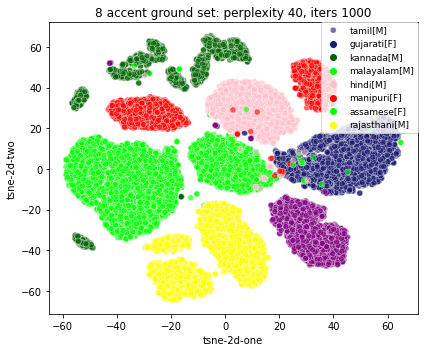

<Figure size 7200x4800 with 0 Axes>

In [26]:
mpl.use('pgf')
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
df['tsne-2d-one'] = tsne_results2[:,0]
df['tsne-2d-two'] = tsne_results2[:,1]
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
# _ax.title.set_text('8 accents (1 speaker each) ground set: perplexity {}, iters {}'.format(perp, iters))
palette = np.array(sns.color_palette("bright", 8))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
#     palette=_color_map(dirs),
#     palette="deep",
    data=df,
    legend="full",
#     markers= [0.5]*y.shape[0],
#     legend=False,
    alpha=0.6,
    ax = _ax
)
g.legend(
         loc='upper right', 
#          loc=1,
         bbox_to_anchor=(1.013, 1.017), 
         prop={'size':10}, markerscale=2,
         labels=[x[0].upper()+x[1] for x in dirs]
)
fig.tight_layout()
# fig.savefig('IndicTTS_t-SNE.svg') # , bbox_inches='tight', pad_inches=0
plt.savefig('IndicTTS_t-SNE-1000.pgf', bbox_inches='tight', format='pgf', dpi=1200)
plt.show()
# plt.close()

In [82]:
import random
import statistics

budget_size = 100
list_total_duration = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    temp_ground_list = ground_list[:]
    random.seed(41 + i)
    random.shuffle(temp_ground_list)
    selected_list = temp_ground_list[:budget_size]     
    total_duration = sum([i['duration'] for i in selected_list])
    list_total_duration.append(total_duration)
print(list_total_duration)
print(statistics.mean(list_total_duration), statistics.variance(list_total_duration))

[405.16151927437636, 416.2097505668934, 369.02471655328793, 404.9663492063492, 373.54430839002254, 392.39437641723345, 394.63179138322005, 372.87029478458066, 398.2815873015873, 378.779433106576]
390.5864126984127 262.5807715346997


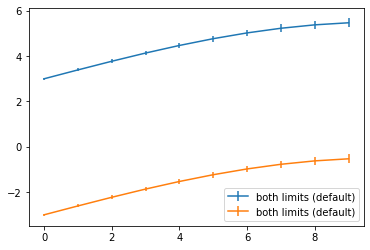

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y - 3, yerr=yerr, label='both limits (default)')


plt.legend(loc='lower right')

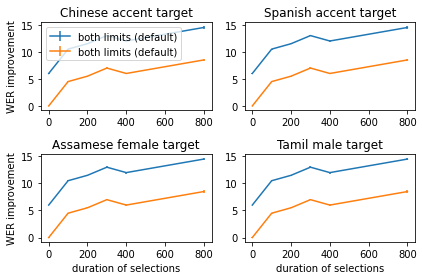

In [46]:
import matplotlib.pyplot as plt

#NEED TO UPDATE, EACH ONE HAS DIFFERENT VALUES IN MINUTES

#tamil, assamese, 
x = np.array([0,100,200,300,400,800])
y = np.array([0.0,4.5,5.5,7.0,6.0,8.5])
yerr = np.linspace(0.05, 0.2, 6)

#chinese flmi
plt.subplot(2, 2, 1)
plt.errorbar(x, y + 6, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y - 0, yerr=yerr, label='both limits (default)')
plt.title('Chinese accent target')
plt.legend(loc='upper left')
plt.ylabel("WER improvement")

#spanish logdetmi
plt.subplot(2, 2, 2)
plt.errorbar(x, y + 6, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y - 0, yerr=yerr, label='both limits (default)')
# plt.legend(loc='lower right')
plt.title('Spanish accent target')

#assamese flmi
plt.subplot(2, 2, 3)
plt.errorbar(x, y + 6, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y - 0, yerr=yerr, label='both limits (default)')
# plt.legend(loc='lower right')
plt.title('Assamese female target')
plt.xlabel("duration of selections")
plt.ylabel("WER improvement")

#tamil logdetmi
plt.subplot(2, 2, 4)
plt.errorbar(x, y + 6, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y - 0, yerr=yerr, label='both limits (default)')
# plt.legend(loc='lower right')
plt.title('Tamil male target')
plt.xlabel("duration of selections")

plt.tight_layout()
plt.savefig('budget.svg')
plt.show()
plt.close()
# plt.figure(figsize=(12, 10), dpi=100)